<a href="https://colab.research.google.com/github/NicolLoaiza1/SIS420-Laboratorio-10/blob/main/Laboratorio_10_Loaiza_Alvarez_Nicol_Noelia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [72]:
# Loaiza Alvarez Nicol Noelia

In [73]:
import numpy as np
import pandas as pd
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D
from scipy import optimize
%matplotlib inline

In [74]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [75]:
data = pd.read_csv("/content/drive/MyDrive/SIS 420 Dataset/Regresion Logistica Dataset.csv", delimiter=',')
data = np.array(data)
x = data[:, 0:18]
y = data[:,19]
print(x)
print('-'*45)
print(y)

[[2.000e+03 7.000e+00 0.000e+00 ... 0.000e+00 0.000e+00 0.000e+00]
 [2.001e+03 1.170e+01 1.000e+00 ... 0.000e+00 0.000e+00 0.000e+00]
 [2.002e+03 5.600e+00 1.000e+00 ... 1.000e+00 0.000e+00 0.000e+00]
 ...
 [3.285e+03 4.600e+00 1.000e+00 ... 0.000e+00 1.000e+00 1.000e+00]
 [3.286e+03 3.400e+00 0.000e+00 ... 0.000e+00 0.000e+00 1.000e+00]
 [3.289e+03 6.000e+00 0.000e+00 ... 0.000e+00 0.000e+00 0.000e+00]]
---------------------------------------------
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0.
 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0

In [76]:
x = np.array(x)
y = np.array(y)
n_ejemplos = y.size

In [77]:
def plotData(x, y):
    # Grafica los puntos de datos x y y en una nueva figura. Grafica los puntos de datos con * para los positivos y 
    # o para los negativos.
    fig = pyplot.figure()
    pos = y == 1
    neg = y == 0
    pyplot.plot(x[pos, 0], x[pos, 1], 'k*', lw=2, ms=10)
    pyplot.plot(x[neg, 0], x[neg, 1], 'ko', mfc='y', ms=8, mec='k', mew=1)

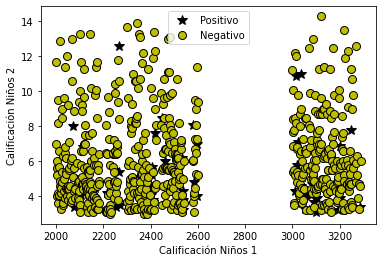

In [78]:
plotData(x, y)
pyplot.xlabel('Calificación Niños 1')
pyplot.ylabel('Calificación Niños 2')
pyplot.legend(['Positivo', 'Negativo'])
pass

In [79]:
def funcionSigmoidea(z):
  z = np.array(z)
  g = 1/(1+np.exp(-z))
  return g

In [80]:
x = np.concatenate((np.ones((n_ejemplos,1)),x),axis=1)

In [81]:
def calcularCosto(theta, x, y):
  h = funcionSigmoidea(x.dot(theta.T))
  J = (1/n_ejemplos)*np.sum(-y.dot(np.log(h))-(1-y).dot(np.log(1-h)))
  return J

In [82]:
def descensoGradiente(x, y, theta, alpha, n_iteraciones):
  historial_J = []
  theta = theta.copy()
  for i in range (n_iteraciones):
    h = funcionSigmoidea(x.dot(theta.T))
    theta = theta-(alpha/n_ejemplos)*(h-y).dot(x)
    historial_J.append(calcularCosto(theta,x,y))
  return theta, historial_J

In [83]:
def hallarTheta():
  theta = np.zeros(x.shape[1])
  n_iteraciones = 100
  alpha = 0.00001
  theta, historial_J = descensoGradiente(x,y,theta,alpha,n_iteraciones)
  return theta, historial_J

In [84]:
theta, historial_J = hallarTheta()
print("Las thetas encontradas son: ",theta)
print("El menor costo que se pudo determinar fue de: ",historial_J[-1])

Las thetas encontradas son:  [-1.33121047e-06  7.28730836e-04 -1.30765005e-04  3.83960309e-05
 -1.45626033e-05  1.17266666e-05 -2.64877819e-06  2.20978848e-06
 -4.72282193e-06 -3.40037331e-05  3.98954802e-06 -5.01589141e-06
 -6.13077843e-06  2.37612495e-07 -1.27923860e-05  4.03989017e-06
  2.26671485e-05  1.10334626e-05  3.79106843e-06]
El menor costo que se pudo determinar fue de:  1.8068708717803774


Text(0, 0.5, 'Costo J')

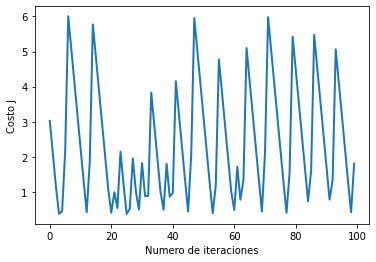

In [85]:
pyplot.plot(np.arange(len(historial_J)), historial_J, lw=2)
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')

In [86]:
def predecir(x):
  x = np.array(x)
  x = np.concatenate((np.ones(1),x))
  y_predecir = funcionSigmoidea(np.dot(x,theta))
  print("El resultado de los valores de X es: ",y_predecir*100)

In [87]:
predecir([3.9,1,1,1,0,0,0,38.0,0,0,0,0,0,1,0,1,0,0])

El resultado de los valores de X es:  50.06410483994495


In [88]:
def funcionCosto(theta, x, y):
    h = funcionSigmoidea(x.dot(theta.T))
    J = (1/n_ejemplos)*np.sum(-y.dot(np.log(h))-(1-y).dot(np.log(1-h)))
    gradiente = (1/n_ejemplos)*(h-y).dot(x)
    return J, gradiente

In [89]:
def optimizarTheta():
  opciones = {"maxiter":1000}
  thetaInicial = np.zeros(x.shape[1])
  optimizacion = optimize.minimize(funcionCosto,thetaInicial,(x,y),jac=True,method="TNC",options=opciones)
  costo = optimizacion.fun
  theta_optimizada = optimizacion.x
  return theta_optimizada, costo

In [90]:
theta_funcionCosto, costo = optimizarTheta()
print(theta_funcionCosto)

[-1.39491919e+00  2.00606127e-04 -2.92207968e-01  1.79739903e+00
 -9.16461105e-01 -4.29682483e-03 -8.76969918e-02  5.79601209e-02
 -3.22891557e-01 -1.16746788e-02  2.66052774e-01 -1.74312596e-02
 -1.65215847e-01  1.84092965e-01 -6.15710931e-01  2.29695835e-01
  4.85015168e-01  4.89897069e-01  6.00626472e-01]


In [91]:
def predecirThetaOptimizada(x):
  x = np.array(x)
  x = np.concatenate((np.ones(1),x))
  y_predecir = funcionSigmoidea(np.dot(x,theta_funcionCosto))
  print("El resultado de los valores de X es: ",y_predecir*100)

In [92]:
predecirThetaOptimizada([3.9,1,1,1,0,0,0,38.0,0,0,0,0,0,1,0,1,0,0])

El resultado de los valores de X es:  0.0001839560923518661


In [93]:
def plotDecisionBoundary(plotData, theta, x, y):
    theta = np.array(theta)
    # Graficar los datos (recordar que la primera columna en x es la intercepción)
    plotData(x[:, 0:18], y)
    if x.shape[1] <= 18:
        # Solo se requieren 2 puntos para definir una linea, para lo cual se eligen dos puntos finales
        plot_x = np.array([np.min(x[:, 1]) - 2, np.max(x[:, 1]) + 2])
        # Calcular la línea límite de decisión
        plot_y = (-1. / theta[2]) * (theta[1] * plot_x + theta[0])
        print(plot_x)
        print(plot_y)
        # Graficar y ajustar los ejes para una mejor visualización
        pyplot.plot(plot_x, plot_y)
        # Leyenda, especifica para el ejercicio
        pyplot.legend(['Positivo', 'Negativo', 'Limite de decisión'])
        pyplot.xlim([30, 100])
        pyplot.ylim([30, 100])
    else:
        # Rango de la grilla
        u = np.linspace(-1, 1.5, 50)
        v = np.linspace(-1, 1.5, 50)
        z = np.zeros((u.size, v.size))
        # Evalua z = theta*x sobre la grilla
        for i, ui in enumerate(u):
            for j, vj in enumerate(v):
                z[i, j] = np.dot(mapFeature(ui, vj), theta)
        z = z.T 
        # print(z)
        # Plot z = 0
        pyplot.contour(u, v, z, levels=[0], linewidths=2, colors='g')
        pyplot.contourf(u, v, z, levels=[np.min(z), 0, np.max(z)], cmap='Greens', alpha=0.4)

In [94]:
# Graficar limites
#plotDecisionBoundary(plotData, theta, x, y)

In [95]:
def metodoNormal(x, y):
  x = np.float64(x)
  y = np.float64(y)
  theta = np.dot(np.dot(np.linalg.inv(np.dot(x.T,x)),x.T),y)
  return theta

In [96]:
theta = metodoNormal(x,y)
print("Las thetas encontradas son: ",theta)
x_predecir = [1,3.9,1,1,1,0,0,0,38.0,0,0,0,0,0,1,0,1,0,0]
x_predecir = np.array(x_predecir)
y_predecir = funcionSigmoidea(np.dot(x_predecir,theta))
print("El resultado de los valores de X es: ",y_predecir*100)

Las thetas encontradas son:  [ 2.07644446e-01  1.62477162e-05 -1.67964914e-02  1.52020044e-01
 -1.06227756e-01 -3.71444717e-03 -1.35887817e-02  5.01183041e-03
 -4.04768647e-02 -8.65726074e-04  1.41772309e-02  2.03167281e-03
 -1.04706034e-02  1.19051505e-02 -5.40043156e-02  1.04997645e-02
  6.43206068e-02  4.54651012e-02  5.66176119e-02]
El resultado de los valores de X es:  21.566652024545316
